# Visualizing data using matlplotlib

__*We will not look at 3D plots!*__

Different type of data:
- Qualitative or Quantitatif
- Discrete or Continuous

These different type of data will have different ways of visualization and different kind of colormaps.

Also, depending of what type of variable is looked at and what interpretation from the data is necessary, different kind of visualization are necessary.

1. How to look at the evolution of a variable

Examples:
- Number of cells over time
- Neural activity over time
- Position over time
- [...]

2. How to look at a distribution

Example:
- Measure on a population

3. How to compare two distributions

Example:
- Comparison of some measurement on two different populations

4. How to look at the distribution of two measurements

5. How to look at the distribution of more than two measurements (next classes)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

There are multiple ways to create plots in matplotlib. We will show these different ways using the plot of a line as an example.

So first, let's create the data to plot:

In [2]:
import numpy as np
Y = np.sin(np.linspace(-np.pi, 2*np.pi, 30))

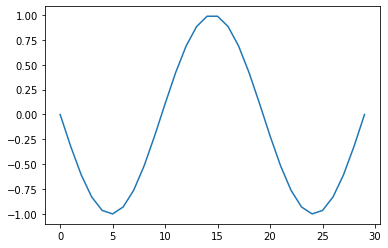

In [3]:
plt.plot(Y)

We are ploting what we want but, the `x` values are not the correct ones (in $[0, 100]$ instead of $[-\pi, 2\pi]$).

The reason is that we are only giving the `y` axis values (note that they are indeed ranging in $[-1, 1]$). So let's give the `x` values:

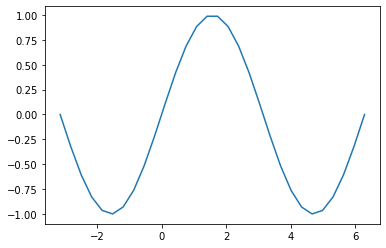

In [4]:
X = np.linspace(-np.pi, 2*np.pi, 30)
Y = np.sin(X)
plt.plot(X, Y)

Matplotlib, by default shows us such data as blue lines between datapoints. We can change that and show only the measured points in red:

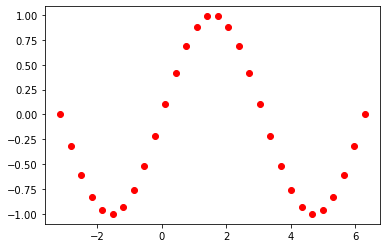

In [5]:
plt.plot(X, Y, marker='o', linestyle='', color='red')

You can find all the different kind of markers, linestyles and colors in the [cheatsheet](https://github.com/matplotlib/cheatsheets#cheatsheets) mentioned before.

Moreover, matplotlib is "nice" and, because the marker, linestyle and color are properties that are often changed they allow an easier way to modify them:

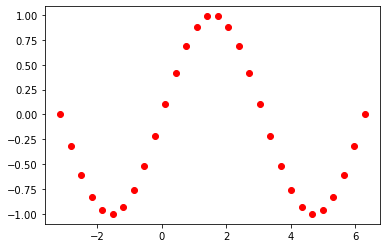

In [6]:
plt.plot(X, Y, 'or')

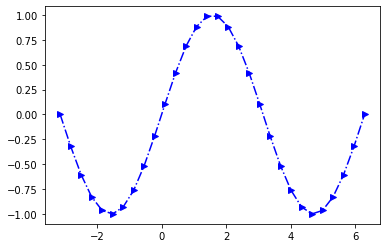

In [7]:
plt.plot(X, Y, 'b-.>')

There is a very large number of parameters for the plots, we will not go through them all here but we will some of them along this course.

Now, calling the plot function directly from matplotlib can sometimes be convenient but it has some disadvantages.
One of the main disadvantage is that all the parameters that are not specified are filled with default values.
For example is the size of the figure.

Another way to create a figure in a more explicit way is the following:

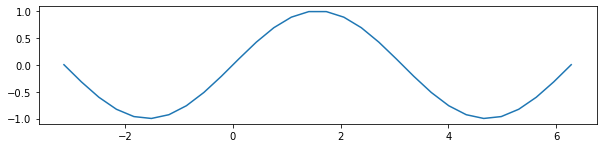

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(aspect=1)
ax.plot(X, Y)

One slightly more compact way to write the lines above is the following:

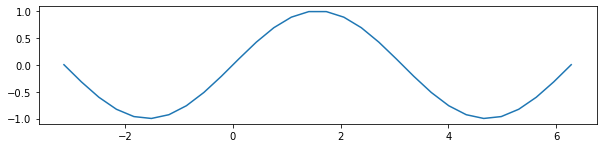

In [9]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'aspect':1})
ax.plot(X, Y)

It is then possible to access many parameters of the subplot `ax` in the figure `fig`.
For example, we can change the minimum and maximum value of the `x` axis with `ax.set_xlim`, change the label of the `y` axis with `ax.set_ylabel`:

Text(0, 0.5, 'Values')

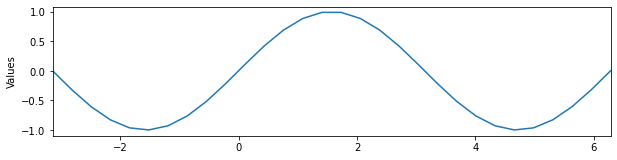

In [10]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'aspect':1})
ax.plot(X, Y)
ax.set_xlim(-np.pi, 2*np.pi)
ax.set_ylabel('Values')

The figures generated by matplotlib have a very specific organisation that is good ot keep in mind when one wants to precisely build a plot, here is its anatomy (this is taken from Nicolas Rougier's book, [there](https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/anatomy.py)):

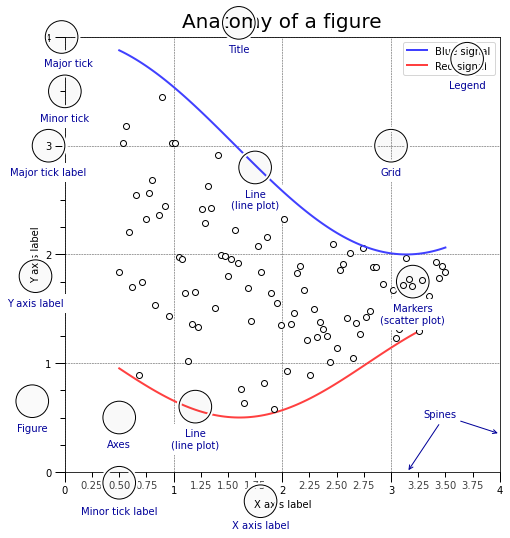

<Figure size 432x288 with 0 Axes>

In [11]:
%run Resources/anatomy.py

## Exercise 1
Build a plot that is fully "legended"

In [12]:
# Do that here

> Side note, it is sometimes useful to have access to mathematical characters for example to display units. Matplotlib allows to do that using the [$\LaTeX$](https://en.wikipedia.org/wiki/LaTeX) formating:
> 
> You can put a `r` before the string and use the usual [$\LaTeX$](https://en.wikipedia.org/wiki/LaTeX) formating like that for example:

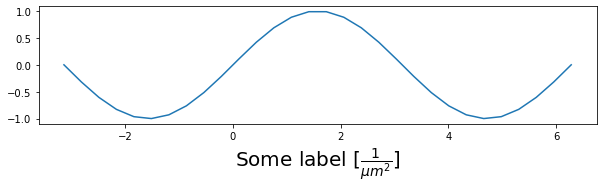

In [13]:
X = np.linspace(-np.pi, 2*np.pi, 30)
Y = np.sin(X)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'aspect':1})
ax.plot(X, Y)
ax.set_xlabel(r'Some label $[\frac{1}{\mu m^2}]$', size=20);

## Multiple plots

If you want to display multiple plots within the same figure, it is of course possible too. The `plt.subplots` parameters `nrows` and `ncols` are there for that:

(3, 2)


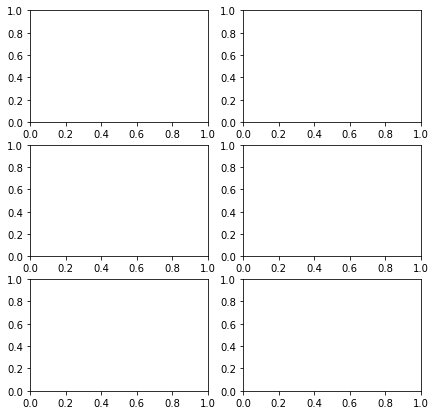

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
print(ax.shape)

Now, let's say that we have two time series recorded at two different times `X1` and `X2`. We can plot them under each other to compare them:

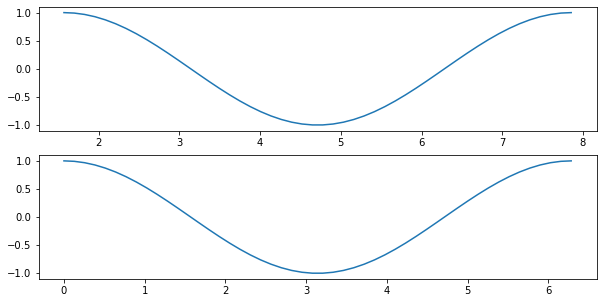

In [15]:
X1 = np.linspace(np.pi/2, 5*np.pi/2)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1)
Y2 = np.cos(X2)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax[0].plot(X1, Y1, '-')
ax[1].plot(X2, Y2, '-')

The problem here is that the two curves look similar because they are plotted on a different `x` axis. There would be multiple ways to make different curves look similar using different `x` or `y` minimum and maximum values:

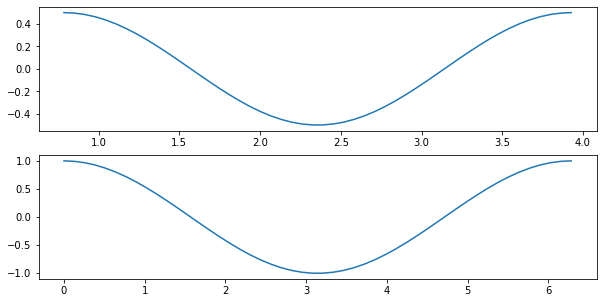

In [16]:
X1 = np.linspace(np.pi/4, 5*np.pi/4)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax[0].plot(X1, Y1, '-')
ax[1].plot(X2, Y2, '-')

In order to keep the `x` and `y` axis similar across subplots, one can either do it manually using the `ax.set_x[y]lim` function or one can use the `sharex` and `sharey` parameters:

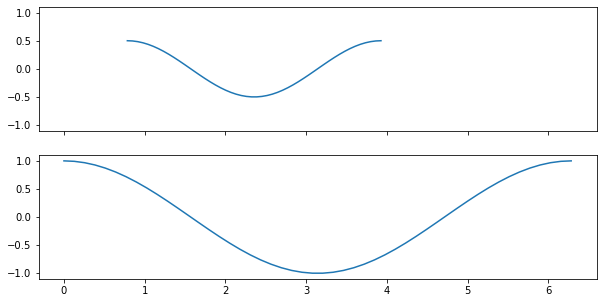

In [17]:
X1 = np.linspace(np.pi/4, 5*np.pi/4)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), sharex=True, sharey=True)
ax[0].plot(X1, Y1, '-')
ax[1].plot(X2, Y2, '-')

Another way to ensure that the two curves are comparable, it is also possible to plot them on the same graph:

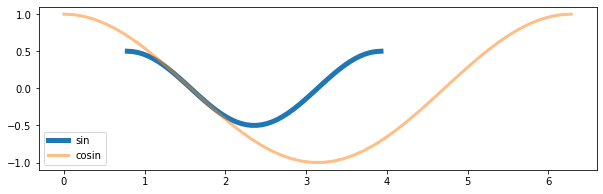

In [18]:
X1 = np.linspace(np.pi/4, 5*np.pi/4)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
ax.plot(X1, Y1, '-', label='sin', lw=5)
ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
ax.legend()

It is also possible to fill bellow a curve or between two curves using the function `ax.fill_between`:

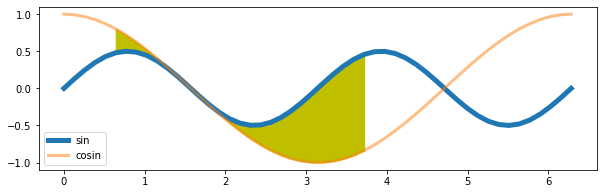

In [19]:
X1 = np.linspace(0, 2*np.pi)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
ax.plot(X1, Y1, '-', label='sin', lw=5)
ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
ax.legend()

Different styles are available with matplotlib to customize your plots, you can list them with the command `plt.style.available`:

In [20]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


And you can use them with the command `plt.style.context`:

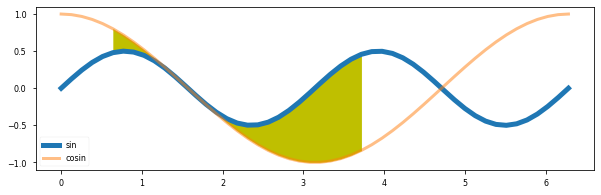

In [21]:
with plt.style.context('seaborn-paper'):
    X1 = np.linspace(0, 2*np.pi)
    X2 = np.linspace(0, 2*np.pi)
    Y1 = np.sin(X1*2)/2
    Y2 = np.cos(X2)

    fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
    ax.plot(X1, Y1, '-', label='sin', lw=5)
    ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
    ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
    ax.legend()

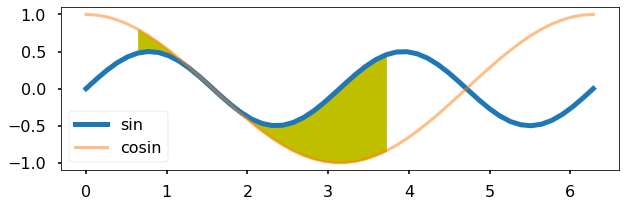

In [22]:
with plt.style.context('seaborn-poster'):
    X1 = np.linspace(0, 2*np.pi)
    X2 = np.linspace(0, 2*np.pi)
    Y1 = np.sin(X1*2)/2
    Y2 = np.cos(X2)

    fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
    ax.plot(X1, Y1, '-', label='sin', lw=5)
    ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
    ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
    ax.legend()

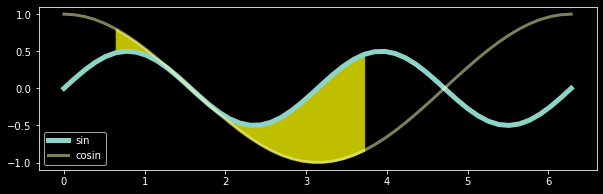

In [23]:
with plt.style.context('dark_background'):
    X1 = np.linspace(0, 2*np.pi)
    X2 = np.linspace(0, 2*np.pi)
    Y1 = np.sin(X1*2)/2
    Y2 = np.cos(X2)

    fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
    ax.plot(X1, Y1, '-', label='sin', lw=5)
    ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
    ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
    ax.legend()

Note the use of the `with` statement.
It is not necessary, but if you want to use a given style for only one figure, that is the easiest way to do so.
If you do not put the `with` statement, you will keep the style for the whole session.

All these styles are based on parameters that are stored in `rcParams` and can be seen from the dictionary `plt.style.library`

In [24]:
plt.style.library['dark_background']

RcParams({'axes.edgecolor': 'white',
          'axes.facecolor': 'black',
          'axes.labelcolor': 'white',
          'axes.prop_cycle': cycler('color', ['#8dd3c7', '#feffb3', '#bfbbd9', '#fa8174', '#81b1d2', '#fdb462', '#b3de69', '#bc82bd', '#ccebc4', '#ffed6f']),
          'boxplot.boxprops.color': 'white',
          'boxplot.capprops.color': 'white',
          'boxplot.flierprops.color': 'white',
          'boxplot.flierprops.markeredgecolor': 'white',
          'boxplot.whiskerprops.color': 'white',
          'figure.edgecolor': 'black',
          'figure.facecolor': 'black',
          'grid.color': 'white',
          'lines.color': 'white',
          'patch.edgecolor': 'white',
          'savefig.edgecolor': 'black',
          'savefig.facecolor': 'black',
          'text.color': 'white',
          'xtick.color': 'white',
          'ytick.color': 'white'})

In [25]:
plt.style.library['seaborn-poster']

RcParams({'axes.labelsize': 17.6,
          'axes.titlesize': 19.2,
          'figure.figsize': [12.8, 8.8],
          'grid.linewidth': 1.6,
          'legend.fontsize': 16.0,
          'lines.linewidth': 2.8,
          'lines.markeredgewidth': 0.0,
          'lines.markersize': 11.2,
          'patch.linewidth': 0.48,
          'xtick.labelsize': 16.0,
          'xtick.major.pad': 11.2,
          'xtick.major.width': 1.6,
          'xtick.minor.width': 0.8,
          'ytick.labelsize': 16.0,
          'ytick.major.pad': 11.2,
          'ytick.major.width': 1.6,
          'ytick.minor.width': 0.8})

Each of these parameters can be checked and changed via `mpl.rcParams`:

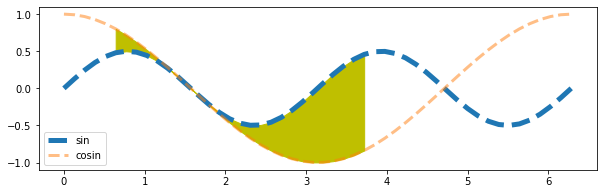

In [26]:
mpl.rcParams['lines.linestyle'] = '--'
X1 = np.linspace(0, 2*np.pi)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(X1, Y1, label='sin', lw=5)
ax.plot(X2, Y2, label='cosin', lw=3, alpha=.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
ax.legend();

If you made too many changes and you do not remember what were the original settings you can call the function `mpl.rcdefaults()`:

In [27]:
mpl.rcdefaults()

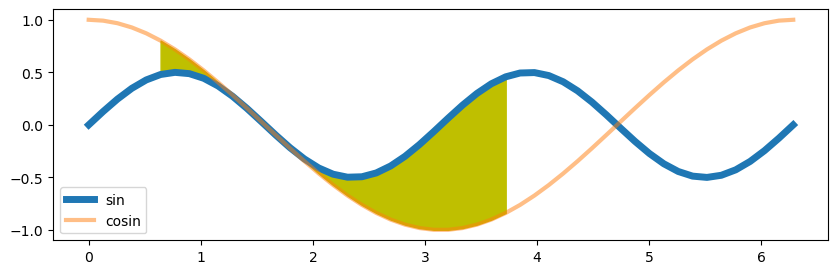

In [28]:
X1 = np.linspace(0, 2*np.pi)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(X1, Y1, '-', label='sin', lw=5)
ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
ax.legend();

On top of the previous styles and parameters you can further customize your plots, for example you can remove the frame:

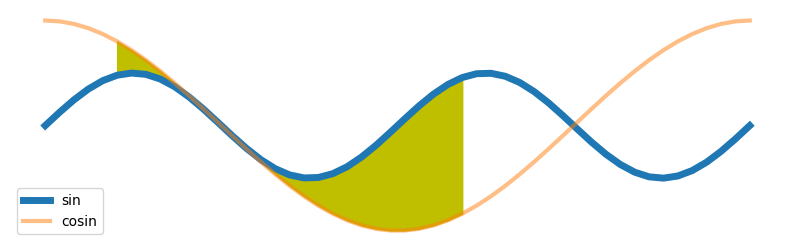

In [29]:
X1 = np.linspace(0, 2*np.pi)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
ax.plot(X1, Y1, '-', label='sin', lw=5)
ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
# Here is the line to remove the frame:
ax.set_frame_on(False)
# And the lines to remove the ticks in the x and y axes
ax.set_xticks([])
ax.set_yticks([])
ax.legend();

Or just the right and top part of the frame:

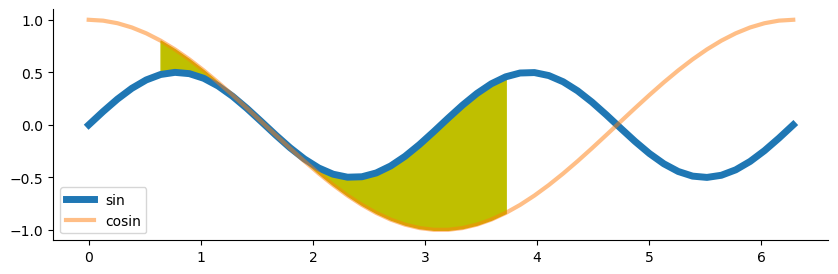

In [30]:
X1 = np.linspace(0, 2*np.pi)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
ax.plot(X1, Y1, '-', label='sin', lw=5)
ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend();

Offsetting the axes:

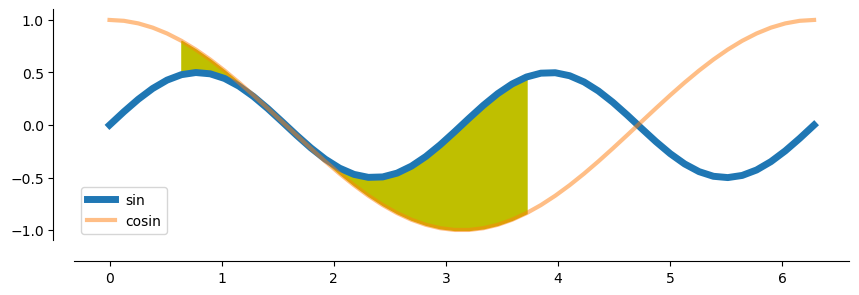

In [31]:
X1 = np.linspace(0, 2*np.pi)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
ax.plot(X1, Y1, '-', label='sin', lw=5)
ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Here is the offset
ax.spines['bottom'].set_position(('outward', 15))
ax.spines['left'].set_position(('outward', 15))
ax.legend();

Even triming the axes (slightly more complicated):

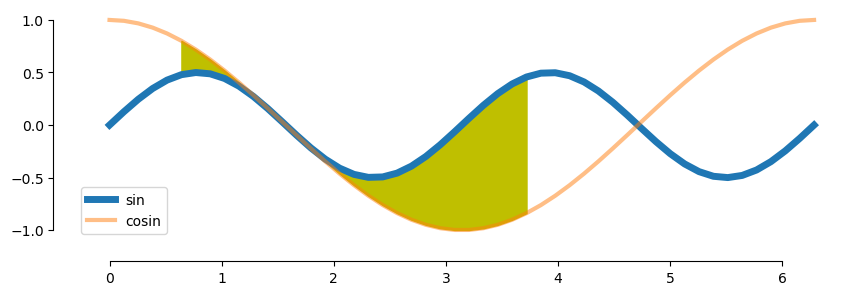

In [32]:
X1 = np.linspace(0, 2*np.pi)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
ax.plot(X1, Y1, '-', label='sin', lw=5)
ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 15))
ax.spines['left'].set_position(('outward', 15))

# getting the x ticks
xticks = np.asarray(ax.get_xticks())
# getting the first and last ticks to know where to trim
firsttick = xticks[min(ax.get_xlim()) <= xticks][0]
lasttick = xticks[xticks <= max(ax.get_xlim())][-1]
# setting the bounds of the x axis
ax.spines['bottom'].set_bounds(firsttick, lasttick)
# cleaning the ticks (sometimes they are unshown ticks)
xticks = xticks[(firsttick <= xticks) & (xticks <= lasttick)]
ax.set_xticks(xticks)

# same for y axis
yticks = np.asarray(ax.get_yticks())
firsttick = yticks[min(ax.get_ylim()) <= yticks][0]
lasttick = yticks[yticks <= max(ax.get_ylim())][-1]
ax.spines['left'].set_bounds(firsttick, lasttick)
yticks = yticks[(firsttick <= yticks) & (yticks <= lasttick)]
ax.set_yticks(yticks)

ax.legend();

There is another way to do that using `seaborn`, but we will explore that later if we have time:

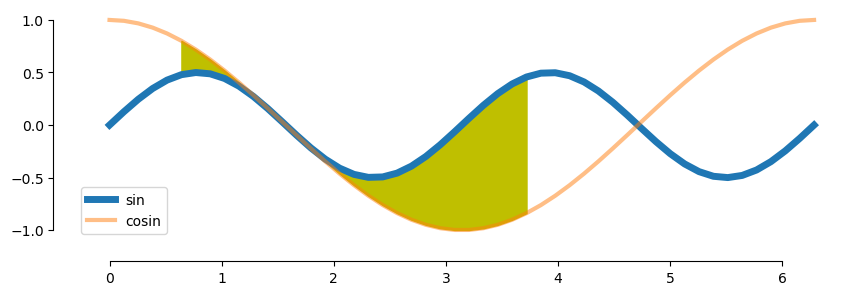

In [33]:
import seaborn as sns
X1 = np.linspace(0, 2*np.pi)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
ax.plot(X1, Y1, '-', label='sin', lw=5)
ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
sns.despine(trim=True, offset=15, ax=ax)
ax.legend();

Once we are happy with our figure, we can save it with `fig.savefig`. The function `fig.savefig` can take multiple out formats such as png, jpeg, pdf or svg:

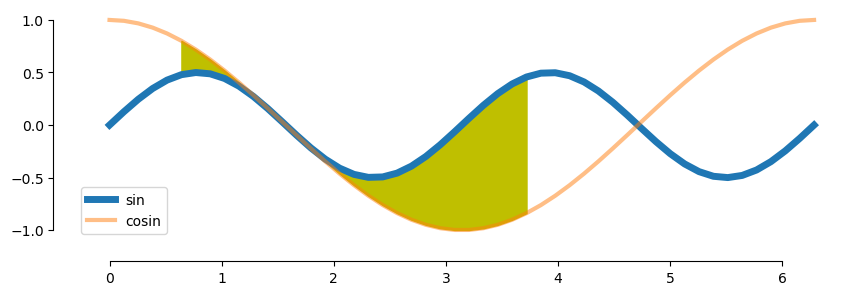

In [34]:
X1 = np.linspace(0, 2*np.pi)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
ax.plot(X1, Y1, '-', label='sin', lw=5)
ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
sns.despine(trim=True, offset=15, ax=ax)
ax.legend();
fig.savefig('Sin-test.pdf')
fig.savefig('Sin-test.png')
fig.savefig('Sin-test.jpeg')

You should see that the figure actually does not fit in the figure produced. It can happen sometimes (we choose here an example when it happens). There is a very efficient and practical way to solve the issue: `fig.tight_layout`:

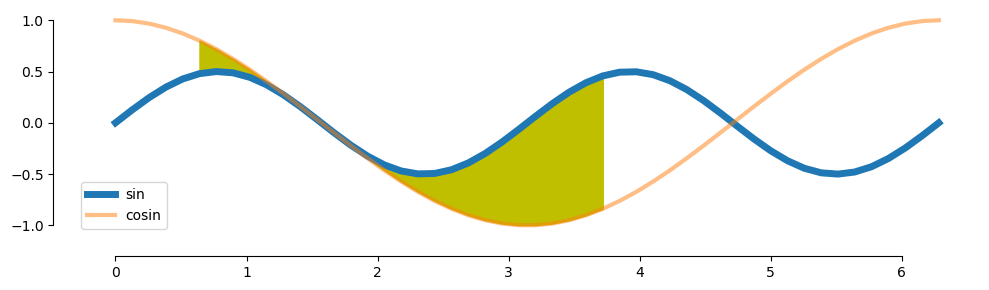

In [35]:
import seaborn as sns
X1 = np.linspace(0, 2*np.pi)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(figsize=(10, 3), sharex=True, sharey=True)
ax.plot(X1, Y1, '-', label='sin', lw=5)
ax.plot(X2, Y2, '-', label='cosin', lw=3, alpha=.5)
ax.fill_between(X1[5:30], Y1[5:30], Y2[5:30], color='y')
sns.despine(trim=True, offset=15, ax=ax)
ax.legend();
fig.tight_layout()
fig.savefig('Sin-test-2.png')

The function `fig.tight_layout` actually take your current figure and adjust it so that it fits as best as possible within your output figure layout, conserving all the current properties of the figure (the scalling for example). What it means is that to be as efficient as possible, this function should be called just before saving the figure.

More over, there are multiple potentially useful options to save a figure for example:
- `dpi`: gives the resolution of the figure in dots per inch. The higher the value is the higher the quality but also the higher the weight of the figure (the dpi makes less sense when ploting in vectorial formats such as `pdf`)
- `transparent`: a boolean, if `True` then all the background of the figure is transparent (if it was not given an color)

### On the use of colormaps.
Choosing colors can be a fairly hard task. Thankfully, matplotlib has a handful of colormaps already made for us, you can find them [there](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

The way colormaps usually work within matplotlib is by giving a color code provided a value between 0 and 1.
In other words, the colormap is a linear mapping between the interval $[0, 1]$ and the colors of the colormap.

Here is an example on how to use them:

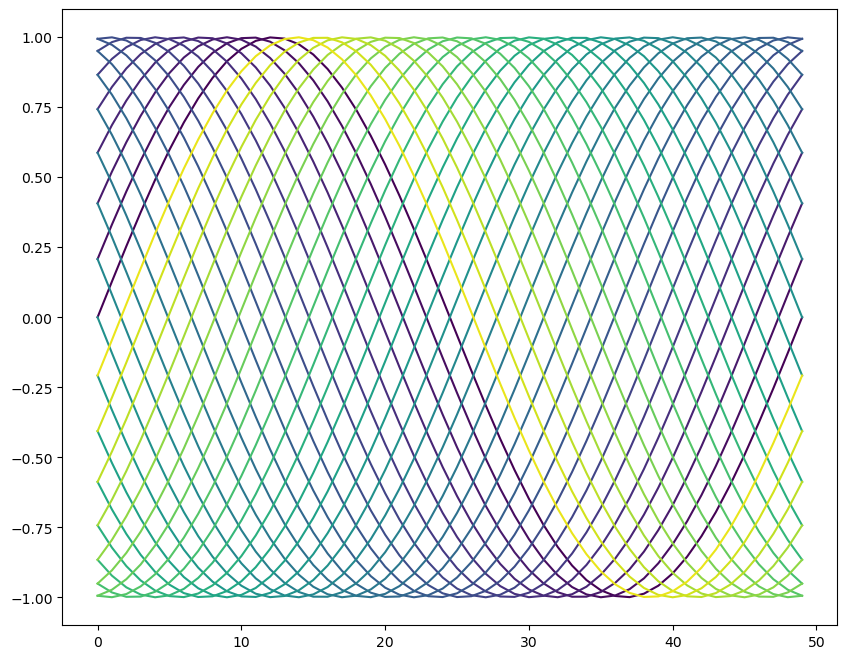

In [36]:
# here we get the colormap
cmap = mpl.cm.get_cmap('viridis')

X = np.linspace(0, 2*np.pi)
nb_curves = 30
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(nb_curves):
    curve = np.sin(X + i*2*np.pi/nb_curves)
    color = cmap(i/nb_curves)
    ax.plot(curve, color=color)

While, unfortunately, I don't know a way of listing all the available colormaps in matplotlib (you should therefore go [there](https://matplotlib.org/stable/tutorials/colors/colormaps.html)), calling `mpl.cm.get_cmap` without assigning it to a variable plots the colormap:

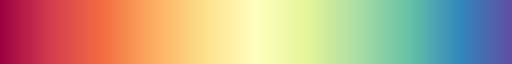

In [37]:
mpl.cm.get_cmap('Spectral')

### Exercice:
Make a plot that resemble the following one:

![](Resources/exercice_1.png)

To do so you will need to use the parameter `zorder` from `ax.plot` and `ax.fill_between`.
You can find some documentation [there](https://matplotlib.org/stable/gallery/misc/zorder_demo.html).

You can find in `Resources.UsefulFunctions` the function `build_curve` to help you generate random curves. That being said, you building such a function would be a good training (that's why it is not directly accessible from the help, to prevent a bit the temptation)

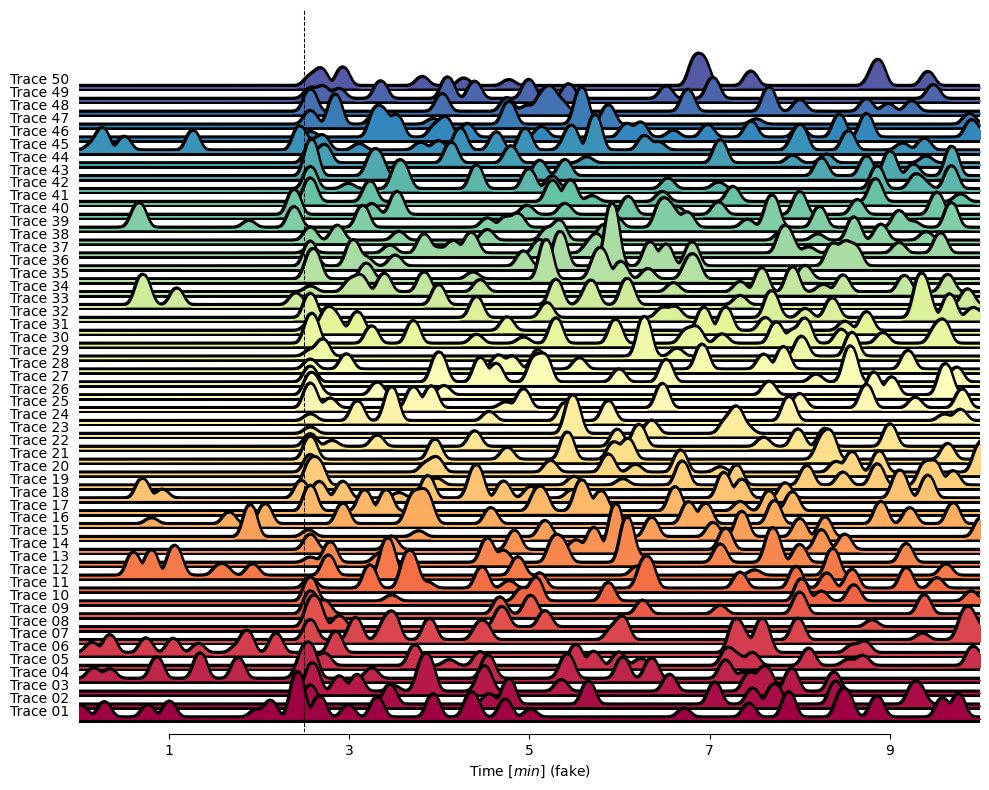

In [38]:
np.random.seed(1)
from Resources.UsefulFunctions import build_curve
nb_plots = 50
max_height = 5
min_height = 1
length = 500
freq = .03
sigma = 3
start = 25
start_freq = .25
cmap = mpl.cm.get_cmap("Spectral")
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(nb_plots):
    Y = build_curve(length, freq, min_height, max_height,
                    start, start_freq, sigma)
    X = np.linspace(0, 10, len(Y))
    ax.plot(X, 3 * Y + i, color="k", linewidth=5, zorder=nb_plots - i)
    ax.plot(X, [i]*len(Y), color="k", linewidth=5, zorder=nb_plots - i)
    color = cmap(i / nb_plots)
    ax.fill_between(X, 3 * Y + i, i, color=color, zorder=nb_plots - i)
    
ax.yaxis.set_tick_params(tick1On=False)
ax.set_xlim(0, 10)
ax.set_ylim(-1, nb_plots+max_height)
ax.axvline(10*start/100, ls="--", lw=0.75, color="black", zorder=250)
ax.set_xticks(range(1, 10, 2))
ax.spines['bottom'].set_bounds(1, 9)
ax.yaxis.set_tick_params(labelleft=True)
ax.set_yticks(np.arange(nb_plots))
ax.set_yticklabels([f"Trace {i:02d}" for i in range(1, nb_plots+1)])
ax.set_xlabel(r'Time [$min$] (fake)')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_verticalalignment("bottom")
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# Here is the offset
ax.spines['bottom'].set_position(('outward', 2))

fig.tight_layout()
fig.savefig('Resources/exercice_1.png')